<a href="https://colab.research.google.com/github/aliimronf2/pacd-assignments/blob/main/PCD_Assignment01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Notebook ini disusun oleh Ali Imron Filayaty Faqih untuk memenuhi tugas 1st Assignment.

Notebook ini membahas metode _downsampling_ dan _upsampling_ dengan menyertakan dua bagian:
- Teori yang diambil dari referensi.
- Kode Python untuk memberikan demonstrasi program dari kedua metode tersebut untuk array 2D dan citra versi grayscale.

# Downsampling

## Teori Downsampling

Ada tiga metode untuk melakukan downsampling pada citra, antara lain:
- Max pooling, yaitu mengambil nilai maksimum dari setiap sub-matriks (patch)
- Mean pooling, yaitu mengambil rata-rata dari setiap sub-matriks (patch)
- Median pooling, yaitu mengambil median dari setiap sub-matriks (patch)

**Rumus ukuran output pada downsampling**

Citra berukuran $H\times W$, jika di-_downsampling_ dengan kernel berukuran $k\times k$, stride $s$ dan padding $p$, akan menghasilkan output berukuran
$$\text{out}_h = \left\lfloor \frac{H-k+2p}{s}\right\rfloor + 1$$
$$\text{out}_w = \left\lfloor \frac{W-k+2p}{s}\right\rfloor + 1$$

Keterangan:
- kernel: matriks kecil yang digeser melintasi citra
- stride: langkah pergeseran patch (sub-matriks) di sepanjang baris dan kolom.
- padding: menambah baris atau kolom ekstra, agar ukuran matriks pas dengan kernel dan stride

**Contoh:**

Diberikan block pixel sebagai berikut:
<center>
<table>
    <tr><td>76</td><td>124</td><td>244</td><td>180</td></tr>
    <tr><td>60</td><td>72</td><td>92</td><td>108</td></tr>
    <tr><td>24</td><td>98</td><td>130</td><td>126</td></tr>
    <tr><td>80</td><td>235</td><td>112</td><td>142</td></tr>
</table>
</center>

Block di atas dibagi menjadi 4 sub-matriks berukuran 2x2, dengan kernel 2 dan stride 2, diperoleh output dengan ukuran
$$\text{tinggi} = \text{out}_h = \left\lfloor \frac{4-2}{2} \right\rfloor + 1 = 2$$
$$\text{lebar} = \text{out}_w = \left\lfloor \frac{4-2}{2} \right\rfloor + 1 = 2$$

Dengan demikian, matriks di atas dibagi menjadi

- Patch A:
  <center>
  <table>
      <tr><td>76</td><td>124</td></tr>
      <tr><td>60</td><td>72</td></tr>
  </table>
  </center>

- Patch B:
  <center>
  <table>
      <tr><td>244</td><td>180</td></tr>
      <tr><td>92</td><td>108</td></tr>
  </table>
  </center>

- Patch C:
  <center>
  <table>
      <tr><td>24</td><td>98</td></tr>
      <tr><td>80</td><td>235</td></tr>
  </table>
  </center>

- Patch D:
  <center>
  <table>
      <tr><td>130</td><td>126</td></tr>
      <tr><td>112</td><td>142</td></tr>
  </table>
  </center>

## Contoh Downsampling dengan Max Pooling

Max pooling memilih nilai maksimum dari setiap sub-matriks (patch) pada contoh di atas, sebagai berikut:

- Dari patch A,
    <table>
        <tr><td>76</td><td>124</td></tr>
        <tr><td>60</td><td>72</td></tr>
    </table>

    diperoleh nilai maksimum 124.

- Dari patch B,
    <table>
        <tr><td>244</td><td>180</td></tr>
        <tr><td>92</td><td>108</td></tr>
    </table>

    diperoleh nilai maksimum 244.

- Dari patch C,
    <table>
        <tr><td>24</td><td>98</td></tr>
        <tr><td>80</td><td>235</td></tr>
    </table>

    diperoleh nilai maksimum 235.

- dari patch D,
    <table>
        <tr><td>130</td><td>126</td></tr>
        <tr><td>112</td><td>142</td></tr>
    </table>

    diperoleh nilai maksimum 142.
  

Dengan demikian, diperoleh citra hasil downsampling dengan max pooling adalah
<center>
    <table>
        <tr><td>124</td><td>244</td></tr>
        <tr><td>235</td><td>142</td></tr>
    </table>
</center>

## Implementasi Max Pooling dengan Program Python

Pada program di bawah ini, digunakan library numpy untuk menuliskan array 2D beserta fungsi aggregat seperti max, mean, dan median.

In [62]:
import numpy as np
from PIL import Image
import requests
from io import BytesIO

def downsampling(img, target_h, target_w, method="max", save_path=None):
    '''
    Downsampling untuk array 2D (grayscale) atau file citra (convert ke grayscale)
    - img: np.ndarray (height, width) atau path/url ke citra (png/jpg)
    - target_h, target_w: ukuran citra hasil downsampling
    - method: "max", "mean", "median"
    - save_path: jika diberikan, citra hasil downsampling akan disimpan
    '''

    # menerima input
    if isinstance(img, str):
        if img.startswith("http://") or img.startswith("https://"):
            response = requests.get(img)
            img = Image.open(BytesIO(response.content)).convert("L")
        else:
            img = Image.open(img).convert("L")
    elif isinstance(img, Image.Image):
        img = img.convert("L")  # pastikan grayscale
    elif isinstance(img, np.ndarray):
        pass
    else:
        raise TypeError("Input img harus path string, URL, PIL.Image, atau numpy.ndarray")

    arr = np.array(img)
    H, W = arr.shape
    out = np.zeros((target_h, target_w), dtype=np.uint8)

    h_block = H / target_h
    w_block = W / target_w

    for i in range(target_h):
        for j in range(target_w):
            row_start = int(i * h_block)
            row_end   = int((i + 1) * h_block)
            col_start = int(j * w_block)
            col_end   = int((j + 1) * w_block)

            sub = arr[row_start:row_end, col_start:col_end]

            # opsi method
            if method == "max":
              out[i, j] = np.max(sub)
            elif method == "mean":
              out[i,j] = int(np.round(np.mean(sub)))
            elif method == "median":
              out[i,j] = int(np.round(np.median(sub)))
            else:
              raise ValueError("Method harus 'max', 'mean', atau 'median'")

    # menyimpan output
    output = out.astype(np.uint8)
    output_img = Image.fromarray(output)

    if save_path:
      output_img.save(save_path)

    return output_img, output

Contoh downsampling array 2D dengan method max pooling

In [63]:
# Contoh penggunaan dengan array 2D
X4 = np.array([
    [ 76, 124, 244, 180],
    [ 60,  72,  92, 108],
    [ 24,  98, 130, 126],
    [ 80, 235, 112, 142]
], dtype=np.float64)

_, down_max = downsampling(X4, target_h=2, target_w=2, method="max")

In [64]:
print("Hasil downsampling dengan max pooling adalah\n", down_max)

Hasil downsampling dengan max pooling adalah
 [[124 244]
 [235 142]]


Contoh downsampling citra dengan method max pooling

In [65]:
!wget -O dike.png "https://drive.google.com/uc?export=download&id=1CK1VVIP9IqX4A3bTIED7mx2uegvaX2qr"

--2025-09-09 14:03:52--  https://drive.google.com/uc?export=download&id=1CK1VVIP9IqX4A3bTIED7mx2uegvaX2qr
Resolving drive.google.com (drive.google.com)... 74.125.134.102, 74.125.134.113, 74.125.134.100, ...
Connecting to drive.google.com (drive.google.com)|74.125.134.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1CK1VVIP9IqX4A3bTIED7mx2uegvaX2qr&export=download [following]
--2025-09-09 14:03:52--  https://drive.usercontent.google.com/download?id=1CK1VVIP9IqX4A3bTIED7mx2uegvaX2qr&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.217.203.132, 2607:f8b0:400c:c07::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.217.203.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13553 (13K) [image/png]
Saving to: ‘dike.png’

dike.png            100%[===================>]  13.24K  --.-KB/s    in 0s      

2025-

In [66]:
import requests
from io import BytesIO

img_path = "/content/dike.png"
img = Image.open(img_path)
img_array = np.array(img)
print(f"Ukuran citra {img_array.shape}")

Ukuran citra (192, 192, 4)


In [67]:
img_path = "/content/dike.png"
output_path = "img_down_max.png"
img_down_max, arr_down_max = downsampling(img_path, target_h=64, target_w=64, method="max", save_path=output_path)

In [68]:
print("Hasil array:", arr_down_max.shape)

Hasil array: (64, 64)


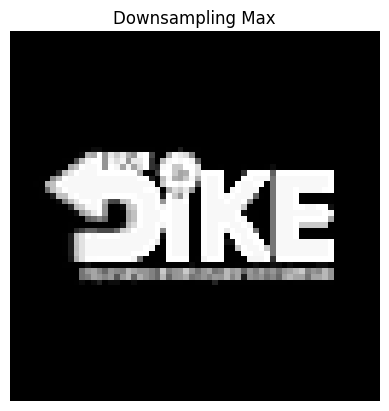

In [69]:
import matplotlib.pyplot as plt

output_img = Image.open("/content/img_down_max.png")

plt.imshow(output_img, cmap="gray")
plt.axis("off")
plt.title("Downsampling Max")
plt.show()

## Downsampling Max Pooling & Quantization

Pada program di bawah ini, diberikan quantization untuk 2-bit, 4-bit, dan 8-bit.

In [70]:
import numpy as np

def quantize_index(img, out_bit=2):
    """
    Kuantisasi gambar ke indeks level (0 .. 2^out_bit - 1)
    """
    levels = 2 ** out_bit
    img_min, img_max = img.min(), img.max()
    # Normalisasi
    norm = (img - img_min) / (img_max - img_min)

    q_index = np.round(norm * (levels - 1)).astype(int)
    return np.clip(q_index, 0, levels-1)

def quantize_image_gray(img, out_bit=8):
    """
    Kuantisasi grayscale ke n-bit dengan normalisasi min-max
    - img: array (float atau int)
    - out_bit: jumlah bit (misal 2, 4, 8)

    Hasil akhir dalam bentuk nilai intensitas (0..255).
    """
    levels = 2 ** out_bit
    img_min, img_max = img.min(), img.max()

    # Normalisasi ke [0,1]
    norm = (img - img_min) / (img_max - img_min)

    # Mapping ke level [0..levels-1]
    idx = np.round(norm * (levels - 1))

    # Skala balik ke [0..255]
    step = 255 / (levels - 1)
    q_img = (idx * step).astype(np.uint8)

    return q_img

In [71]:
# Penggunaan

# Kuantisasi versi index level dari hasil downsampling
down_max_q2_idx = quantize_index(down_max, out_bit=2)
down_max_q4_idx = quantize_index(down_max, out_bit=4)
down_max_q8_idx = quantize_index(down_max, out_bit=8)

print("Hasil downsampling max pooling:\n", down_max)
print("\n2-bit index (0-3):\n", down_max_q2_idx)
print("\n4-bit index (0-15):\n", down_max_q4_idx)
print("\n8-bit index (0-255):\n", down_max_q8_idx)

Hasil downsampling max pooling:
 [[124 244]
 [235 142]]

2-bit index (0-3):
 [[0 3]
 [3 0]]

4-bit index (0-15):
 [[ 0 15]
 [14  2]]

8-bit index (0-255):
 [[  0 255]
 [236  38]]


**Visualisasi perbandingan array 2D original dan hasil downsampling+quantisasi**

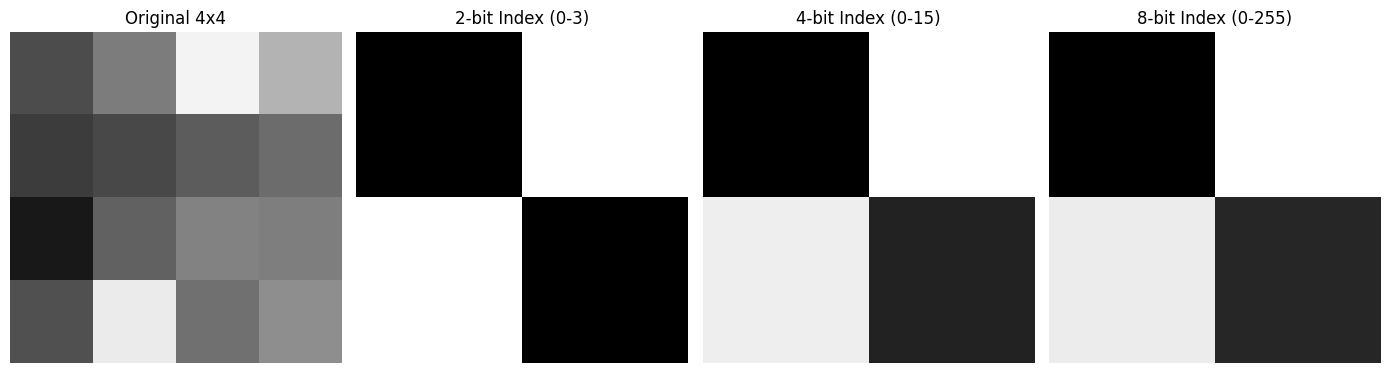

In [72]:
import matplotlib.pyplot as plt

# --- Visualisasi Original & Quantization Index ---
fig, axs = plt.subplots(1, 4, figsize=(14, 4))
axs[0].imshow(X4, cmap="gray", vmin=0, vmax=255)
axs[0].set_title("Original 4x4")
axs[0].axis("off")

axs[1].imshow(down_max_q2_idx, cmap="gray", vmin=0, vmax=3)
axs[1].set_title("2-bit Index (0-3)")
axs[1].axis("off")

axs[2].imshow(down_max_q4_idx, cmap="gray", vmin=0, vmax=15)
axs[2].set_title("4-bit Index (0-15)")
axs[2].axis("off")

axs[3].imshow(down_max_q8_idx, cmap="gray", vmin=0, vmax=255)
axs[3].set_title("8-bit Index (0-255)")
axs[3].axis("off")

plt.tight_layout()
plt.show()

**Visualisasi perbandingan citra original dengan hasil downsampling**

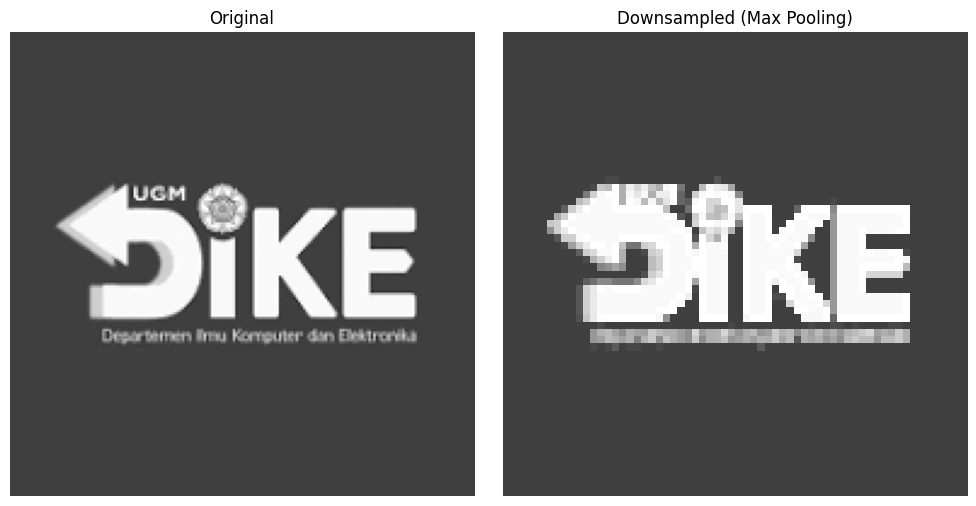

In [73]:
import matplotlib.pyplot as plt
from PIL import Image

img_orig = Image.open("dike.png").convert("L")
img_down = Image.open("img_down_max.png").convert("L")

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(img_orig, cmap="gray", vmin=0, vmax=255)
axs[0].set_title("Original")
axs[0].axis("off")

axs[1].imshow(img_down, cmap="gray", vmin=0, vmax=255)
axs[1].set_title("Downsampled (Max Pooling)")
axs[1].axis("off")

plt.tight_layout()
plt.show()


---

## Contoh Downsampling dengan Mean Pooling

Mean pooling memilih rata-rata dari setiap patch di atas.

- Dari patch A,
    <table>
        <tr><td>76</td><td>124</td></tr>
        <tr><td>60</td><td>72</td></tr>
    </table>

  diperoleh mean
  $$\frac{76+124+60+72}{4} = 83$$

- Dari patch B,
    <table>
        <tr><td>244</td><td>180</td></tr>
        <tr><td>92</td><td>108</td></tr>
    </table>

  diperoleh mean

  $$
  \frac{244+180+92+108}{4} = 156
  $$

- Dari patch C,
    <table>
        <tr><td>24</td><td>98</td></tr>
        <tr><td>80</td><td>235</td></tr>
    </table>

  diperoleh mean

  $$
  \frac{24+98+80+235}{4} = 109,25
  $$

  yang dibulatkan menjadi 109.

- Dari patch D,
    <table>
        <tr><td>130</td><td>126</td></tr>
        <tr><td>112</td><td>142</td></tr>
    </table>

  diperoleh mean

  $$\frac{130+126+112+142}{4} = 127.5$$

  yang dibulatkan menjadi 128.

Dengan demikian, diperoleh citra hasil downsampling dengan mean pooling adalah
<center>
  <table>
      <tr><td>83</td><td>156</td></tr>
      <tr><td>109</td><td>128</td></tr>
  </table>
</center>

## Implementasi Mean Pooling dengan Program Python

Contoh downsampling array 2D dengan method mean pooling

In [74]:
# Contoh penggunaan dengan array 2D
X4 = np.array([
    [ 76, 124, 244, 180],
    [ 60,  72,  92, 108],
    [ 24,  98, 130, 126],
    [ 80, 235, 112, 142]
], dtype=np.float64)

_, down_mean = downsampling(X4, target_h=2, target_w=2, method="mean")

In [75]:
print("Hasil downsampling dengan mean pooling adalah\n", down_mean)

Hasil downsampling dengan mean pooling adalah
 [[ 83 156]
 [109 128]]


Contoh downsampling citra dengan method mean pooling

In [76]:
img_path = "/content/dike.png"
output_path = "img_down_mean.png"
img_down_mean, arr_down_mean = downsampling(img_path, target_h=64, target_w=64, method="mean", save_path=output_path)

In [77]:
print("Hasil array:", arr_down_mean.shape)

Hasil array: (64, 64)


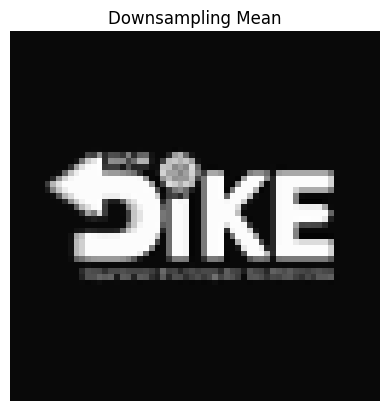

In [78]:
output_img = Image.open("/content/img_down_mean.png")

plt.imshow(output_img, cmap="gray")
plt.axis("off")
plt.title("Downsampling Mean")
plt.show()

## Downsampling dengan Mean Pooling & Quantization

In [79]:
# Kuantisasi versi index level dari hasil downsampling
down_mean_q2_idx = quantize_index(down_mean, out_bit=2)
down_mean_q4_idx = quantize_index(down_mean, out_bit=4)
down_mean_q8_idx = quantize_index(down_mean, out_bit=8)

print("Hasil downsampling max pooling:\n", down_mean)
print("\n2-bit index (0-3):\n", down_mean_q2_idx)
print("\n4-bit index (0-15):\n", down_mean_q4_idx)
print("\n8-bit index (0-255):\n", down_mean_q8_idx)

Hasil downsampling max pooling:
 [[ 83 156]
 [109 128]]

2-bit index (0-3):
 [[0 3]
 [1 2]]

4-bit index (0-15):
 [[ 0 15]
 [ 5  9]]

8-bit index (0-255):
 [[  0 255]
 [ 91 157]]


**Visualisasi perbandingan array 2D original dan hasil downsampling+quantisasi**

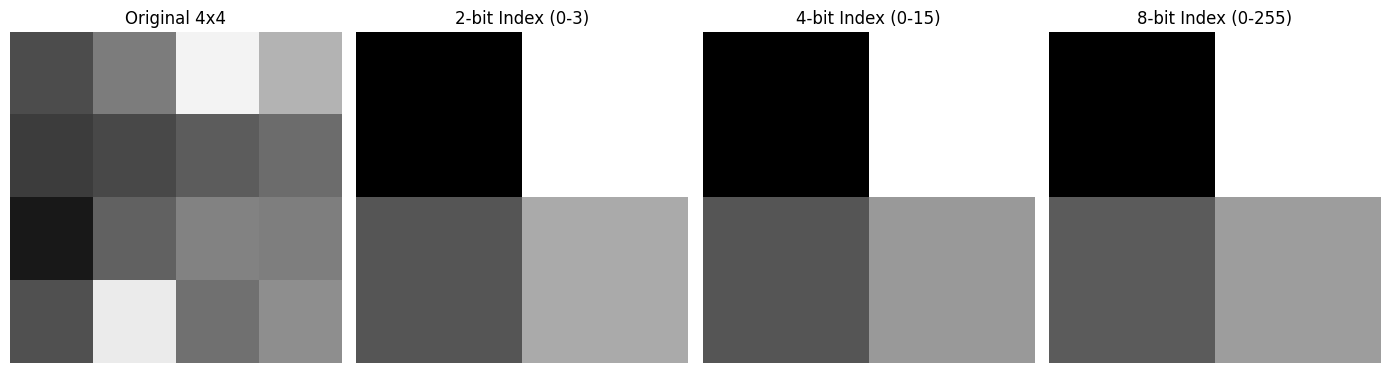

In [80]:
import matplotlib.pyplot as plt

# --- Visualisasi Original & Quantization Index ---
fig, axs = plt.subplots(1, 4, figsize=(14, 4))
axs[0].imshow(X4, cmap="gray", vmin=0, vmax=255)
axs[0].set_title("Original 4x4")
axs[0].axis("off")

axs[1].imshow(down_mean_q2_idx, cmap="gray", vmin=0, vmax=3)
axs[1].set_title("2-bit Index (0-3)")
axs[1].axis("off")

axs[2].imshow(down_mean_q4_idx, cmap="gray", vmin=0, vmax=15)
axs[2].set_title("4-bit Index (0-15)")
axs[2].axis("off")

axs[3].imshow(down_mean_q8_idx, cmap="gray", vmin=0, vmax=255)
axs[3].set_title("8-bit Index (0-255)")
axs[3].axis("off")

plt.tight_layout()
plt.show()

**Visualisasi perbandingan citra original dengan hasil downsampling mean**

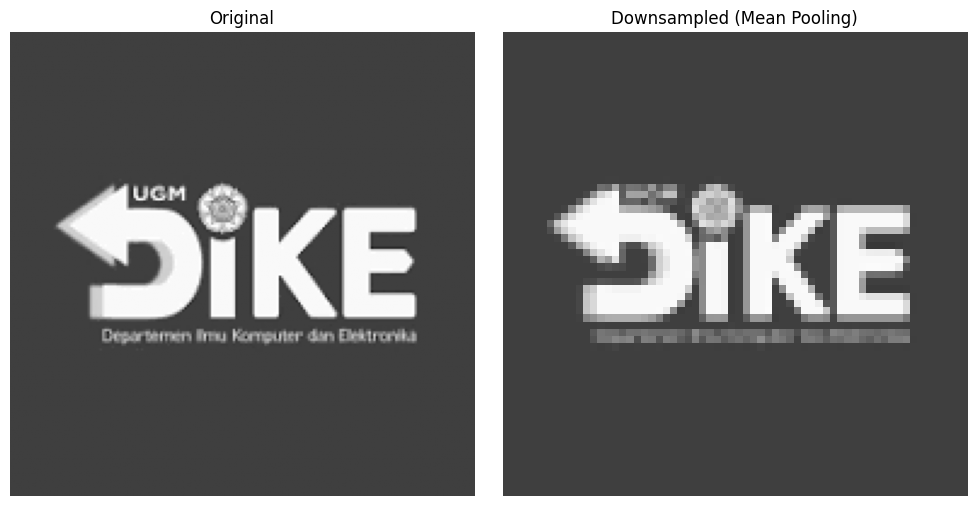

In [81]:
import matplotlib.pyplot as plt
from PIL import Image

img_orig = Image.open("dike.png").convert("L")
img_down = Image.open("img_down_mean.png").convert("L")

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(img_orig, cmap="gray", vmin=0, vmax=255)
axs[0].set_title("Original")
axs[0].axis("off")

axs[1].imshow(img_down, cmap="gray", vmin=0, vmax=255)
axs[1].set_title("Downsampled (Mean Pooling)")
axs[1].axis("off")

plt.tight_layout()
plt.show()


---

## Contoh Downsampling dengan Median Pooling

Median pooling menggunakan median dari setiap patch di atas.

- Dari patch A,
    <table>
        <tr><td>76</td><td>124</td></tr>
        <tr><td>60</td><td>72</td></tr>
    </table>

    diperoleh median 74.

- Dari patch B,
    <table>
        <tr><td>244</td><td>180</td></tr>
        <tr><td>92</td><td>108</td></tr>
    </table>

    diperoleh median 144.

- Dari patch C,
    <table>
        <tr><td>24</td><td>98</td></tr>
        <tr><td>80</td><td>235</td></tr>
    </table>

    diperoleh median 89.

- Dari patch D,
    <table>
        <tr><td>130</td><td>126</td></tr>
        <tr><td>112</td><td>142</td></tr>
    </table>

    diperoleh median 128.
  
Dengan demikian, diperoleh citra hasil downsampling dengan median pooling adalah
<center>
<table>
    <tr><td>74</td><td>144</td></tr>
    <tr><td>89</td><td>128</td></tr>
</table>
</center>

## Implementasi Median Pooling dengan Program Python

In [82]:
# Contoh penggunaan dengan array 2D
X4 = np.array([
    [ 76, 124, 244, 180],
    [ 60,  72,  92, 108],
    [ 24,  98, 130, 126],
    [ 80, 235, 112, 142]
], dtype=np.float64)

_, down_median = downsampling(X4, target_h=2, target_w=2, method="median")

In [83]:
print("Hasil downsampling dengan median pooling adalah\n", down_median)

Hasil downsampling dengan median pooling adalah
 [[ 74 144]
 [ 89 128]]


Contoh downsampling citra dengan method median pooling

In [84]:
img_path = "/content/dike.png"
output_path = "img_down_median.png"
img_down_median, arr_down_median = downsampling(img_path, target_h=64, target_w=64, method="max", save_path=output_path)

In [85]:
print("Hasil array:", arr_down_median.shape)

Hasil array: (64, 64)


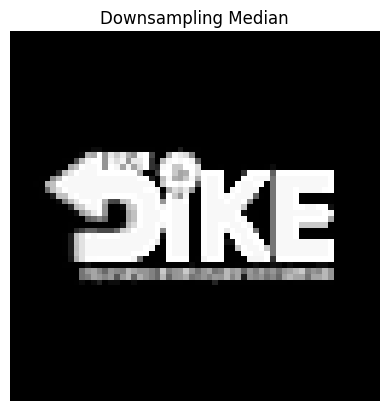

In [86]:
import matplotlib.pyplot as plt

output_img = Image.open("/content/img_down_median.png")

plt.imshow(output_img, cmap="gray")
plt.axis("off")
plt.title("Downsampling Median")
plt.show()

## Downsampling dengan Median Pooling & Quantization

In [87]:
# Kuantisasi versi index level dari hasil downsampling
down_median_q2_idx = quantize_index(down_median, out_bit=2)
down_median_q4_idx = quantize_index(down_median, out_bit=4)
down_median_q8_idx = quantize_index(down_median, out_bit=8)

print("Hasil downsampling max pooling:\n", down_median)
print("\n2-bit index (0-3):\n", down_median_q2_idx)
print("\n4-bit index (0-15):\n", down_median_q4_idx)
print("\n8-bit index (0-255):\n", down_median_q8_idx)

Hasil downsampling max pooling:
 [[ 74 144]
 [ 89 128]]

2-bit index (0-3):
 [[0 3]
 [1 2]]

4-bit index (0-15):
 [[ 0 15]
 [ 3 12]]

8-bit index (0-255):
 [[  0 255]
 [ 55 197]]


**Visualisasi perbandingan array 2D original dan hasil downsampling+quantisasi**

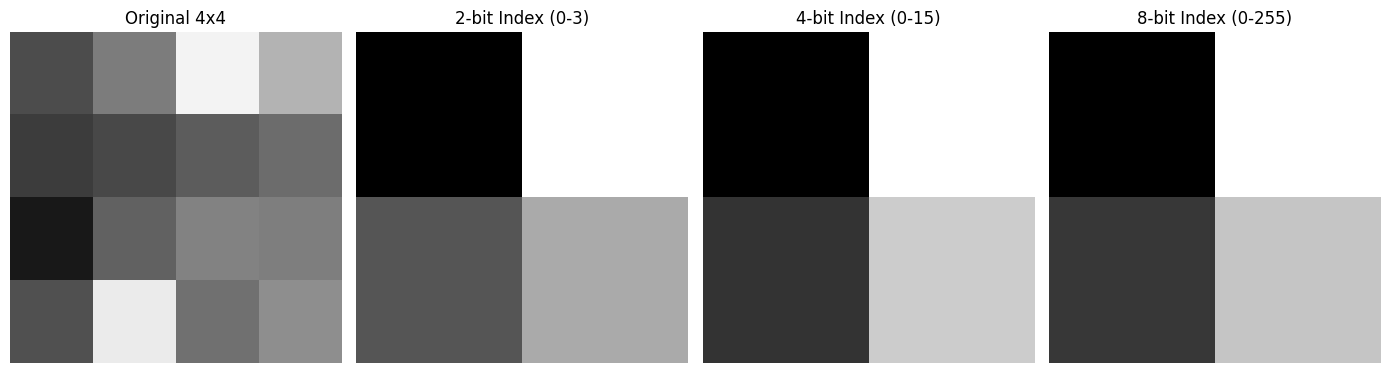

In [88]:
import matplotlib.pyplot as plt

# --- Visualisasi Original & Quantization Index ---
fig, axs = plt.subplots(1, 4, figsize=(14, 4))
axs[0].imshow(X4, cmap="gray", vmin=0, vmax=255)
axs[0].set_title("Original 4x4")
axs[0].axis("off")

axs[1].imshow(down_median_q2_idx, cmap="gray", vmin=0, vmax=3)
axs[1].set_title("2-bit Index (0-3)")
axs[1].axis("off")

axs[2].imshow(down_median_q4_idx, cmap="gray", vmin=0, vmax=15)
axs[2].set_title("4-bit Index (0-15)")
axs[2].axis("off")

axs[3].imshow(down_median_q8_idx, cmap="gray", vmin=0, vmax=255)
axs[3].set_title("8-bit Index (0-255)")
axs[3].axis("off")

plt.tight_layout()
plt.show()

**Visualisasi perbandingan citra original dengan hasil downsampling median**

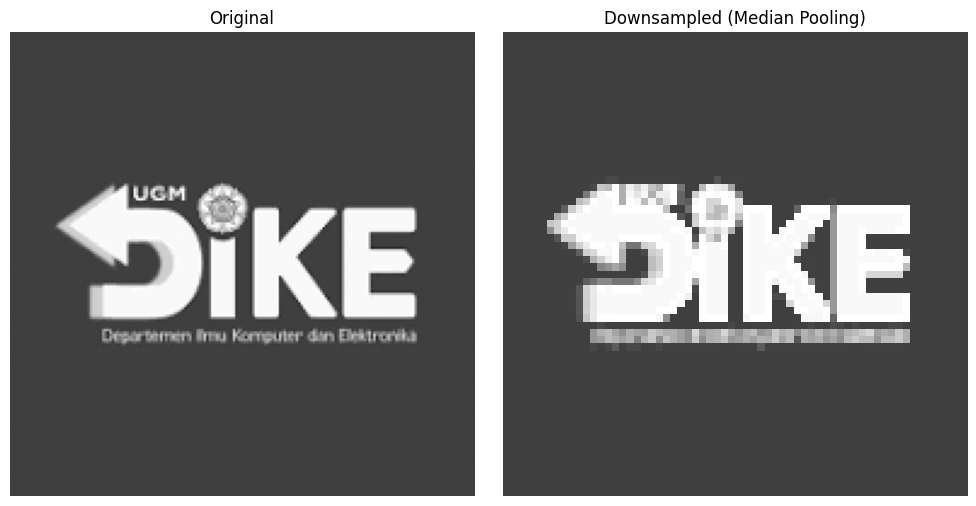

In [89]:
import matplotlib.pyplot as plt
from PIL import Image

img_orig = Image.open("dike.png").convert("L")
img_down = Image.open("img_down_median.png").convert("L")

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(img_orig, cmap="gray", vmin=0, vmax=255)
axs[0].set_title("Original")
axs[0].axis("off")

axs[1].imshow(img_down, cmap="gray", vmin=0, vmax=255)
axs[1].set_title("Downsampled (Median Pooling)")
axs[1].axis("off")

plt.tight_layout()
plt.show()


## Perbandingan dan Analisis Hasil Downsampling

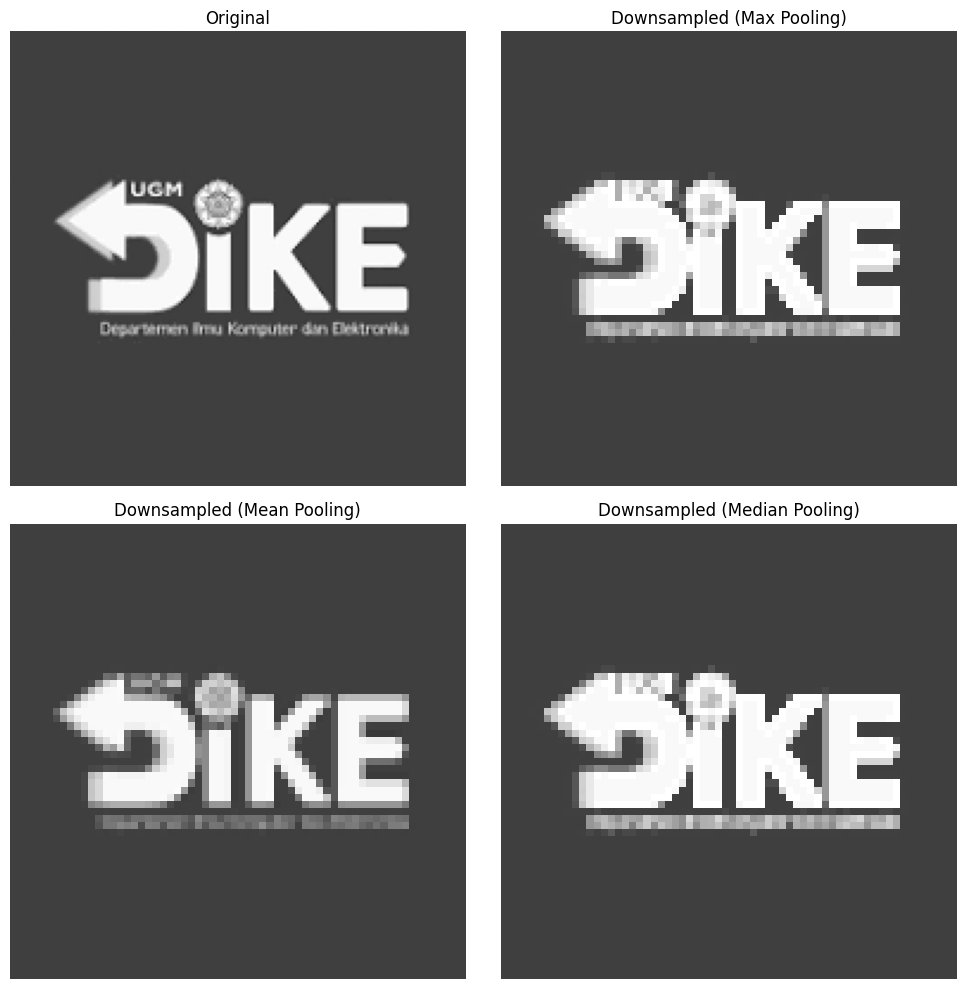

In [90]:
import matplotlib.pyplot as plt
from PIL import Image

# Buka gambar
img_orig   = Image.open("dike.png").convert("L")
img_down_max    = Image.open("img_down_max.png").convert("L")
img_down_mean   = Image.open("img_down_mean.png").convert("L")
img_down_median = Image.open("img_down_median.png").convert("L")

# Plot 2 baris × 2 kolom
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

axs[0,0].imshow(img_orig, cmap="gray", vmin=0, vmax=255)
axs[0,0].set_title("Original")
axs[0,0].axis("off")

axs[0,1].imshow(img_down_max, cmap="gray", vmin=0, vmax=255)
axs[0,1].set_title("Downsampled (Max Pooling)")
axs[0,1].axis("off")

axs[1,0].imshow(img_down_mean, cmap="gray", vmin=0, vmax=255)
axs[1,0].set_title("Downsampled (Mean Pooling)")
axs[1,0].axis("off")

axs[1,1].imshow(img_down_median, cmap="gray", vmin=0, vmax=255)
axs[1,1].set_title("Downsampled (Median Pooling)")
axs[1,1].axis("off")

plt.tight_layout()
plt.show()


Dari perbandingan di atas, dapat disimpulkan bahwa
- Downsampling Max menghasilkan citra dengan tepi dan garis yang lebih tegas. Obyek dalam citra tampak "lebih gemuk" dibanding gambar orisinal.
- Downsampling Mean menghasilkan citra yang lebih halus dibanding Max, tapi semakin kehilangan detail.
- Downsampling Median menghasilkan citra dengan kualitas di antara Mean dan Max, tidak sekasar Max namun masih lebih detail dibanding Mean.

---

# Upsampling


Upsampling adalah proses memperbesar ukuran citra.
Ada beberapa metode yang digunakan: <sup>[1]</sup>
- Nearest Neighbor: setiap pixel diperbesar dengan cara menyalin nilainya, lalu mengisi setiap lokasi baru dengan intensitas dari tetangga terdekatnya di citra asli.
- Bilinear Interpolation: menggunakan 4 tetangga terdekat untuk mengestimasi intensitas di suatu lokasi baru tertentu.

  Untuk metode ini akan digunakan formula mapping<sup>[1]</sup> berikut:
  $$
  g_x=j\cdot \frac{W_{\text{in}}-1}{W_{\text{out}}-1}, \quad g_x=j\cdot \frac{H_{\text{in}}-1}{H_{\text{out}}-1}
  $$

- Bicubic interpolation: menggunakan 16 tetangga terdekat untuk mengestimasi intensitas dari suatu lokasi pixel baru tertentu.

  Untuk bicubic interpolation di bawah, akan digunakan implementasi pemakaian Polinomial Lagrange Kubik

Setelah ukuran citra diperbesar, nilai piksel akan dikuantisasi ke 2-bit (4 level), 4-bit (16 level) dan 8-bit (256 level).

## Nearest Neighbor Interpolation & Quantization

In [101]:
import numpy as np

def upsampling_nearest(img, new_h, new_w, save_path=None):
    """
    Upsampling dengan nearest neighbor
    - img: 2D array (H, W) atau path ke file gambar
    - new_h: tinggi citra target
    - new_w: lebar citra target
    - save_path: path untuk menyimpan hasil
    """

    if isinstance(img, str):
        img = Image.open(img).convert("L")
        img = np.array(img)
    elif isinstance(img, Image.Image):
        img = img.convert("L")
        img = np.array(img)

    h, w = img.shape
    out = np.zeros((new_h, new_w), dtype=img.dtype)

    for i in range(new_h):
        for j in range(new_w):
            # mapping koordinat output -> input
            y = round(i * (h - 1) / (new_h - 1))
            x = round(j * (w - 1) / (new_w - 1))
            out[i, j] = img[y, x]
    if save_path:
        Image.fromarray(out).save(save_path)

    return out

Upsampling $⟶$ Quantization

In [102]:
# Penggunaan
X4 = np.array([
    [76, 124, 244, 180],
    [60,  72,  92, 108],
    [24,  98, 130, 126],
    [80, 235, 112, 142]
], dtype=np.uint8)

# 1) Upsampling dengan nearest neighbor (4x4 -> 8x8)
up_nearest = upsampling_nearest(X4, new_h=8, new_w=8)

# 2) Kuantisasi versi index level
up_nearest_q2_idx = quantize_index(up_nearest, out_bit=2)
up_nearest_q4_idx = quantize_index(up_nearest, out_bit=4)
up_nearest_q8_idx = quantize_index(up_nearest, out_bit=8)

# 3) Kuantisasi versi intensitas ke 2-bit, 4-bit, 8-bit
up_nearest_q2 = quantize_image_gray(up_nearest, out_bit=2)
up_nearest_q4 = quantize_image_gray(up_nearest, out_bit=4)
up_nearest_q8 = quantize_image_gray(up_nearest, out_bit=8)

print("Hasil upsampling nearest neighbor:\n", up_nearest)
print("\n2-bit index (0-3):\n", up_nearest_q2_idx)
print("\n4-bit index (0-15):\n", up_nearest_q4_idx)
print("\n8-bit index (0-255):\n", up_nearest_q8_idx)
print("\nKuantisasi 2-bit:\n", up_nearest_q2)
print("\nKuantisasi 4-bit:\n", up_nearest_q4)
print("\nKuantisasi 8-bit:\n", up_nearest_q8)

Hasil upsampling nearest neighbor:
 [[ 76  76 124 124 244 244 180 180]
 [ 76  76 124 124 244 244 180 180]
 [ 60  60  72  72  92  92 108 108]
 [ 60  60  72  72  92  92 108 108]
 [ 24  24  98  98 130 130 126 126]
 [ 24  24  98  98 130 130 126 126]
 [ 80  80 235 235 112 112 142 142]
 [ 80  80 235 235 112 112 142 142]]

2-bit index (0-3):
 [[1 1 1 1 3 3 2 2]
 [1 1 1 1 3 3 2 2]
 [0 0 1 1 1 1 1 1]
 [0 0 1 1 1 1 1 1]
 [0 0 1 1 1 1 1 1]
 [0 0 1 1 1 1 1 1]
 [1 1 3 3 1 1 2 2]
 [1 1 3 3 1 1 2 2]]

4-bit index (0-15):
 [[ 4  4  7  7 15 15 11 11]
 [ 4  4  7  7 15 15 11 11]
 [ 2  2  3  3  5  5  6  6]
 [ 2  2  3  3  5  5  6  6]
 [ 0  0  5  5  7  7  7  7]
 [ 0  0  5  5  7  7  7  7]
 [ 4  4 14 14  6  6  8  8]
 [ 4  4 14 14  6  6  8  8]]

8-bit index (0-255):
 [[ 60  60 116 116 255 255 181 181]
 [ 60  60 116 116 255 255 181 181]
 [ 42  42  56  56  79  79  97  97]
 [ 42  42  56  56  79  79  97  97]
 [  0   0  86  86 123 123 118 118]
 [  0   0  86  86 123 123 118 118]
 [ 65  65 245 245 102 102 137 137]
 [

**Visualisasi** Upsampling $⟶$ Quantization

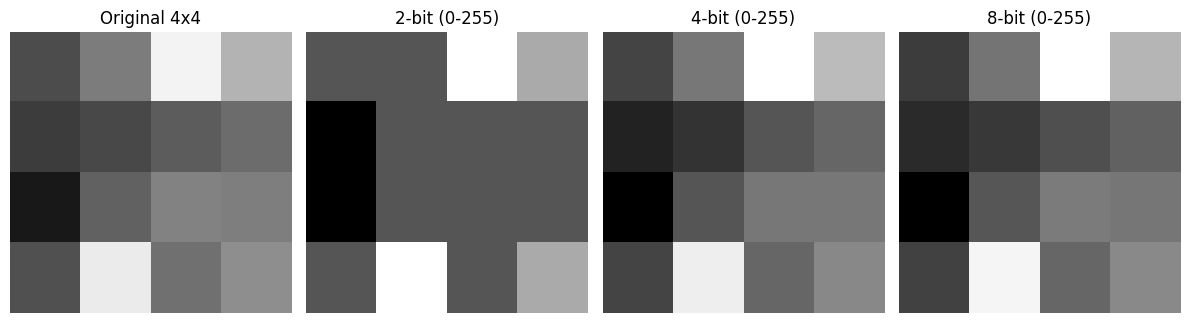

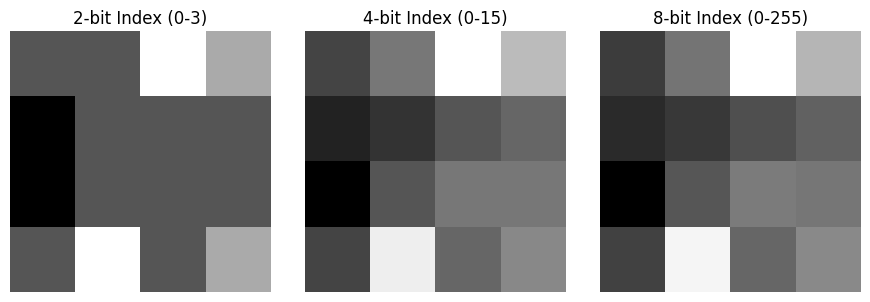

In [103]:
import matplotlib.pyplot as plt

# --- Visualisasi intensitas (0–255) ---
fig, axs = plt.subplots(1, 4, figsize=(12, 4))
axs[0].imshow(X4, cmap="gray", vmin=0, vmax=255)
axs[0].set_title("Original 4x4")
axs[0].axis("off")

axs[1].imshow(up_nearest_q2, cmap="gray", vmin=0, vmax=255)
axs[1].set_title("2-bit (0-255)")
axs[1].axis("off")

axs[2].imshow(up_nearest_q4, cmap="gray", vmin=0, vmax=255)
axs[2].set_title("4-bit (0-255)")
axs[2].axis("off")

axs[3].imshow(up_nearest_q8, cmap="gray", vmin=0, vmax=255)
axs[3].set_title("8-bit (0-255)")
axs[3].axis("off")

plt.tight_layout()
plt.show()

# --- Visualisasi index level ---
fig, axs = plt.subplots(1, 3, figsize=(9, 3))
axs[0].imshow(up_nearest_q2_idx, cmap="gray", vmin=0, vmax=3)
axs[0].set_title("2-bit Index (0-3)")
axs[0].axis("off")

axs[1].imshow(up_nearest_q4_idx, cmap="gray", vmin=0, vmax=15)
axs[1].set_title("4-bit Index (0-15)")
axs[1].axis("off")

axs[2].imshow(up_nearest_q8_idx, cmap="gray", vmin=0, vmax=255)
axs[2].set_title("8-bit Index (0-255)")
axs[2].axis("off")

plt.tight_layout()
plt.show()

## Upsampling Citra dengan Nearest Neighbor

In [108]:
up_nearest_img = upsampling_nearest("dike.png", new_h=384, new_w=384, save_path="dike_up_nearest.png")

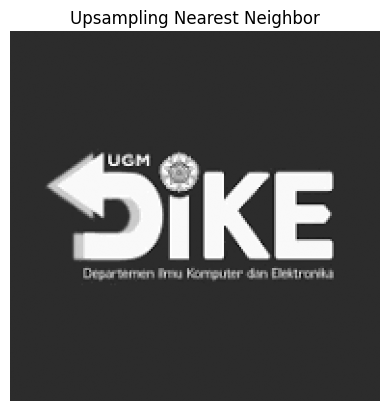

In [109]:
output_img = Image.open("/content/dike_up_nearest.png")

plt.imshow(output_img, cmap="gray")
plt.axis("off")
plt.title("Upsampling Nearest Neighbor")
plt.show()

## Bilinear Interpolation & Quantization

In [110]:
import numpy as np

def upsampling_bilinear_gray(img, new_h, new_w, save_path=None):
    '''
    Upsampling dengan bilinear interpolation
    - img: 2D array (H, W) atau path ke file citra
    - new_h: tinggi citra target
    - new_w: lebar citra target
    - save_path: path untuk menyimpan hasil
    '''
    if isinstance(img, str):
        img = Image.open(img).convert("L")  # grayscale
        img = np.array(img)
    elif isinstance(img, Image.Image):
        img = img.convert("L")
        img = np.array(img)

    # memastikan array 2D
    if img.ndim != 2:
        raise ValueError("Input harus grayscale (array 2D).")

    h, w = img.shape
    out = np.zeros((new_h, new_w), dtype=np.uint8)
    for i in range(new_h):
        for j in range(new_w):
            x = j * (w - 1) / (new_w - 1)
            y = i * (h - 1) / (new_h - 1)
            x0, y0 = int(np.floor(x)), int(np.floor(y))
            x1, y1 = min(x0 + 1, w - 1), min(y0 + 1, h - 1)
            dx, dy = x - x0, y - y0
            val = (img[y0, x0] * (1 - dx) * (1 - dy) +
                   img[y0, x1] * dx * (1 - dy) +
                   img[y1, x0] * (1 - dx) * dy +
                   img[y1, x1] * dx * dy)
            out[i, j] = np.round(val)

    if save_path:
        Image.fromarray(out).save(save_path)

    return out

Upsampling $⟶$ Quantization

In [111]:
# Penggunaan
X4 = np.array([
    [76, 124, 244, 180],
    [60,  72,  92, 108],
    [24,  98, 130, 126],
    [80, 235, 112, 142]
], dtype=np.uint8)

# 1) Upsampling dengan bilinear interpolation (4x4 -> 8x8)
up_bilinear = upsampling_bilinear_gray(X4, new_h=8, new_w=8)

# 2) Kuantisasi versi index level
up_bilinear_q2_idx = quantize_index(up_bilinear, out_bit=2)
up_bilinear_q4_idx = quantize_index(up_bilinear, out_bit=4)
up_bilinear_q8_idx = quantize_index(up_bilinear, out_bit=8)

# 3) Kuantisasi versi intensitas ke 2-bit, 4-bit, 8-bit
up_bilinear_q2 = quantize_image_gray(up_bilinear, out_bit=2)
up_bilinear_q4 = quantize_image_gray(up_bilinear, out_bit=4)
up_bilinear_q8 = quantize_image_gray(up_bilinear, out_bit=8)

print("Hasil upsampling bilinear interpolation:\n", up_bilinear)
print("\n2-bit index (0-3):\n", up_bilinear_q2_idx)
print("\n4-bit index (0-15):\n", up_bilinear_q4_idx)
print("\n8-bit index (0-255):\n", up_bilinear_q8_idx)
print("\nKuantisasi 2-bit:\n", up_bilinear_q2)
print("\nKuantisasi 4-bit:\n", up_bilinear_q4)
print("\nKuantisasi 8-bit:\n", up_bilinear_q8)

Hasil upsampling bilinear interpolation:
 [[ 76  97 117 158 210 235 207 180]
 [ 69  83  97 124 157 175 162 149]
 [ 62  70  77  89 104 114 116 118]
 [ 50  62  75  86  96 104 109 113]
 [ 34  58  83  99 111 119 120 121]
 [ 32  69 105 120 125 128 128 128]
 [ 56 108 159 160 136 122 129 135]
 [ 80 146 213 200 147 116 129 142]]

2-bit index (0-3):
 [[1 1 1 2 3 3 3 2]
 [1 1 1 1 2 2 2 2]
 [0 1 1 1 1 1 1 1]
 [0 0 1 1 1 1 1 1]
 [0 0 1 1 1 1 1 1]
 [0 1 1 1 1 1 1 1]
 [0 1 2 2 2 1 1 2]
 [1 2 3 2 2 1 1 2]]

4-bit index (0-15):
 [[ 3  5  6  9 13 15 13 11]
 [ 3  4  5  7  9 11 10  9]
 [ 2  3  3  4  5  6  6  6]
 [ 1  2  3  4  5  5  6  6]
 [ 0  2  4  5  6  6  7  7]
 [ 0  3  5  7  7  7  7  7]
 [ 2  6  9  9  8  7  7  8]
 [ 4  8 13 12  8  6  7  8]]

8-bit index (0-255):
 [[ 55  82 107 158 224 255 220 186]
 [ 46  64  82 116 157 180 163 147]
 [ 38  48  57  72  90 103 106 108]
 [ 23  38  54  68  80  90  97 102]
 [  3  33  64  84  99 109 111 112]
 [  0  46  92 111 117 121 121 121]
 [ 30  95 160 161 131 113 122 1

**Visualisasi** Upsampling $⟶$ Quantization

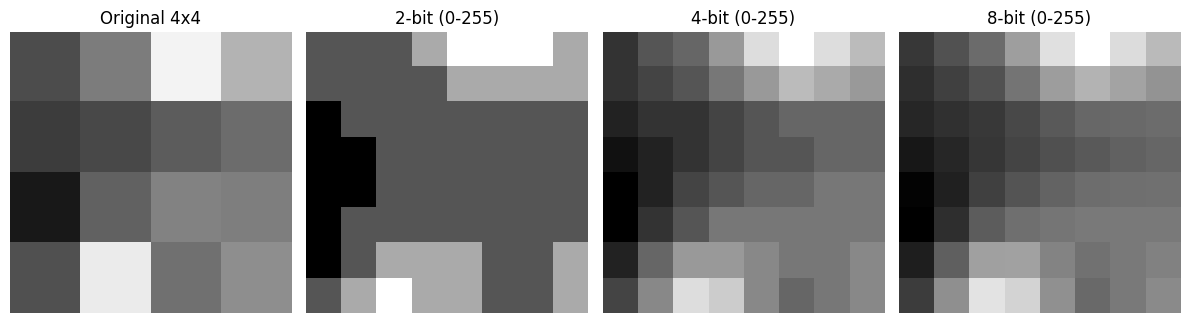

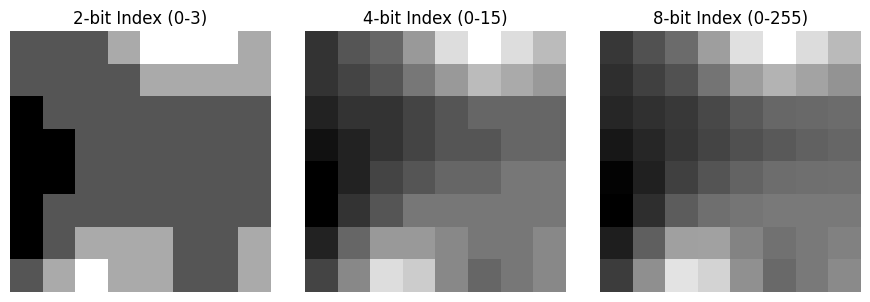

In [112]:
import matplotlib.pyplot as plt

# --- Visualisasi intensitas (0–255) ---
fig, axs = plt.subplots(1, 4, figsize=(12, 4))
axs[0].imshow(X4, cmap="gray", vmin=0, vmax=255)
axs[0].set_title("Original 4x4")
axs[0].axis("off")

axs[1].imshow(up_bilinear_q2, cmap="gray", vmin=0, vmax=255)
axs[1].set_title("2-bit (0-255)")
axs[1].axis("off")

axs[2].imshow(up_bilinear_q4, cmap="gray", vmin=0, vmax=255)
axs[2].set_title("4-bit (0-255)")
axs[2].axis("off")

axs[3].imshow(up_bilinear_q8, cmap="gray", vmin=0, vmax=255)
axs[3].set_title("8-bit (0-255)")
axs[3].axis("off")

plt.tight_layout()
plt.show()

# --- Visualisasi index level ---
fig, axs = plt.subplots(1, 3, figsize=(9, 3))
axs[0].imshow(up_bilinear_q2_idx, cmap="gray", vmin=0, vmax=3)
axs[0].set_title("2-bit Index (0-3)")
axs[0].axis("off")

axs[1].imshow(up_bilinear_q4_idx, cmap="gray", vmin=0, vmax=15)
axs[1].set_title("4-bit Index (0-15)")
axs[1].axis("off")

axs[2].imshow(up_bilinear_q8_idx, cmap="gray", vmin=0, vmax=255)
axs[2].set_title("8-bit Index (0-255)")
axs[2].axis("off")

plt.tight_layout()
plt.show()

## Upsampling Citra dengan Bilinear Interpolation

In [113]:
up_bilinear_img = upsampling_bilinear_gray("dike.png", new_h=384, new_w=384, save_path="dike_up_bilinear.png")

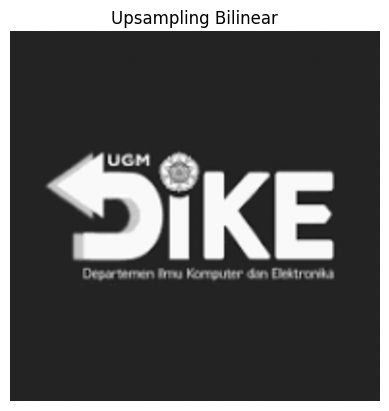

In [114]:
output_img = Image.open("/content/dike_up_bilinear.png")

plt.imshow(output_img, cmap="gray")
plt.axis("off")
plt.title("Upsampling Bilinear")
plt.show()

## Bicubic Interpolation & Quantization

In [115]:
import numpy as np
from PIL import Image

# Fungsi kernel Lagrange cubic
def lagrange_weight(x):
    x0, x1, x2, x3 = -1, 0, 1, 2
    L = []
    for xi in [x0, x1, x2, x3]:
        num, den = 1.0, 1.0
        for xj in [x0, x1, x2, x3]:
            if xj != xi:
                num *= (x - xj)
                den *= (xi - xj)
        L.append(num / den)
    return L

def bicubic_lagrange(img, new_h, new_w, save_path=None):
    """
    Bicubic interpolation (Lagrange polynomial)
    - img: np.ndarray 2D, path string, atau PIL.Image
    - new_h: tinggi target
    - new_w: lebar target
    - save_path: path untuk menyimpan hasil (opsional)
    """

    if isinstance(img, str):
        img = Image.open(img).convert("L")
        img = np.array(img)
    elif isinstance(img, Image.Image):
        img = img.convert("L")
        img = np.array(img)

    # Memastikan array 2D
    if img.ndim != 2:
        raise ValueError("Input harus grayscale (array 2D).")

    h, w = img.shape
    scale_x = w / new_w
    scale_y = h / new_h
    out = np.zeros((new_h, new_w), dtype=np.float32)

    for i in range(new_h):
        for j in range(new_w):
            # koordinat di citra asli
            x = j * scale_x
            y = i * scale_y
            x0 = int(np.floor(x))
            y0 = int(np.floor(y))
            dx, dy = x - x0, y - y0

            # ambil bobot lagrange 1D
            wx = lagrange_weight(dx)
            wy = lagrange_weight(dy)

            val = 0.0
            for m in range(-1, 3):
                for n in range(-1, 3):
                    xm = min(max(x0 + m, 0), w - 1)
                    yn = min(max(y0 + n, 0), h - 1)
                    val += img[yn, xm] * wx[m+1] * wy[n+1]

            out[i, j] = np.clip(val, 0, 255)

    out = out.astype(np.uint8)

    if save_path:
        Image.fromarray(out).save(save_path)

    return out

Upsampling $⟶$ Quantization

In [116]:
# Penggunaan
X4 = np.array([
    [76, 124, 244, 180],
    [60,  72,  92, 108],
    [24,  98, 130, 126],
    [80, 235, 112, 142]
], dtype=np.uint8)

# 1) Upsampling dengan bicubic interpolation (4x4 -> 8x8)
up_bicubic = bicubic_lagrange(X4, new_h=8, new_w=8)

# 2) Kuantisasi versi index level
up_bicubic_q2_idx = quantize_index(up_bicubic, out_bit=2)
up_bicubic_q4_idx = quantize_index(up_bicubic, out_bit=4)
up_bicubic_q8_idx = quantize_index(up_bicubic, out_bit=8)

# 3) Kuantisasi versi intensitas ke 2-bit, 4-bit, 8-bit
up_bicubic_q2 = quantize_image_gray(up_bicubic, out_bit=2)
up_bicubic_q4 = quantize_image_gray(up_bicubic, out_bit=4)
up_bicubic_q8 = quantize_image_gray(up_bicubic, out_bit=8)

print("Hasil upsampling bicubic interpolation:\n", up_bicubic)
print("\n2-bit index (0-3):\n", up_bicubic_q2_idx)
print("\n4-bit index (0-15):\n", up_bicubic_q4_idx)
print("\n8-bit index (0-255):\n", up_bicubic_q8_idx)
print("\nKuantisasi 2-bit:\n", up_bicubic_q2)
print("\nKuantisasi 4-bit:\n", up_bicubic_q4)
print("\nKuantisasi 8-bit:\n", up_bicubic_q8)

Hasil upsampling bicubic interpolation:
 [[ 76  92 124 191 244 219 180 176]
 [ 70  78  96 134 165 158 142 141]
 [ 60  64  72  81  92 101 108 109]
 [ 37  53  73  89 102 108 111 112]
 [ 24  59  98 118 130 130 126 125]
 [ 49 111 168 152 123 126 135 135]
 [ 80 165 235 181 112 119 142 143]
 [ 83 171 243 185 110 118 143 145]]

2-bit index (0-3):
 [[1 1 1 2 3 3 2 2]
 [1 1 1 2 2 2 2 2]
 [0 1 1 1 1 1 1 1]
 [0 0 1 1 1 1 1 1]
 [0 0 1 1 1 1 1 1]
 [0 1 2 2 1 1 2 2]
 [1 2 3 2 1 1 2 2]
 [1 2 3 2 1 1 2 2]]

4-bit index (0-15):
 [[ 4  5  7 11 15 13 11 10]
 [ 3  4  5  8 10  9  8  8]
 [ 2  3  3  4  5  5  6  6]
 [ 1  2  3  4  5  6  6  6]
 [ 0  2  5  6  7  7  7  7]
 [ 2  6 10  9  7  7  8  8]
 [ 4 10 14 11  6  6  8  8]
 [ 4 10 15 11  6  6  8  8]]

8-bit index (0-255):
 [[ 60  79 116 194 255 226 181 176]
 [ 53  63  83 128 163 155 137 136]
 [ 42  46  56  66  79  89  97  99]
 [ 15  34  57  75  90  97 101 102]
 [  0  41  86 109 123 123 118 117]
 [ 29 101 167 148 115 118 129 129]
 [ 65 163 245 182 102 110 137 13

**Visualisasi** Upsampling $⟶$ Quantization

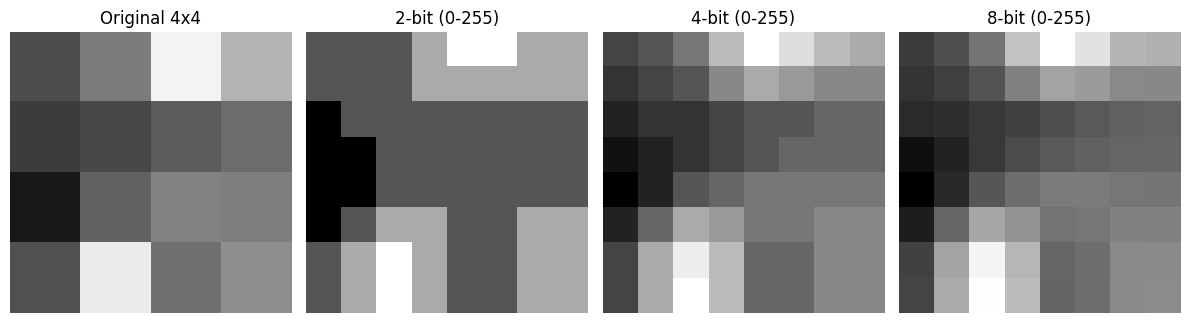

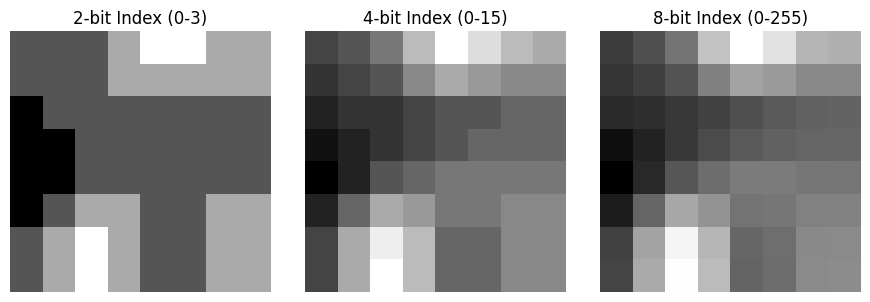

In [117]:
import matplotlib.pyplot as plt

# --- Visualisasi intensitas (0–255) ---
fig, axs = plt.subplots(1, 4, figsize=(12, 4))
axs[0].imshow(X4, cmap="gray", vmin=0, vmax=255)
axs[0].set_title("Original 4x4")
axs[0].axis("off")

axs[1].imshow(up_bicubic_q2, cmap="gray", vmin=0, vmax=255)
axs[1].set_title("2-bit (0-255)")
axs[1].axis("off")

axs[2].imshow(up_bicubic_q4, cmap="gray", vmin=0, vmax=255)
axs[2].set_title("4-bit (0-255)")
axs[2].axis("off")

axs[3].imshow(up_bicubic_q8, cmap="gray", vmin=0, vmax=255)
axs[3].set_title("8-bit (0-255)")
axs[3].axis("off")

plt.tight_layout()
plt.show()

# --- Visualisasi index level ---
fig, axs = plt.subplots(1, 3, figsize=(9, 3))
axs[0].imshow(up_bicubic_q2_idx, cmap="gray", vmin=0, vmax=3)
axs[0].set_title("2-bit Index (0-3)")
axs[0].axis("off")

axs[1].imshow(up_bicubic_q4_idx, cmap="gray", vmin=0, vmax=15)
axs[1].set_title("4-bit Index (0-15)")
axs[1].axis("off")

axs[2].imshow(up_bicubic_q8_idx, cmap="gray", vmin=0, vmax=255)
axs[2].set_title("8-bit Index (0-255)")
axs[2].axis("off")

plt.tight_layout()
plt.show()

## Upsampling Citra dengan Bicubic Interpolation

In [118]:
up_bicubic_img = bicubic_lagrange("dike.png", new_h=384, new_w=384, save_path="dike_up_bicubic.png")

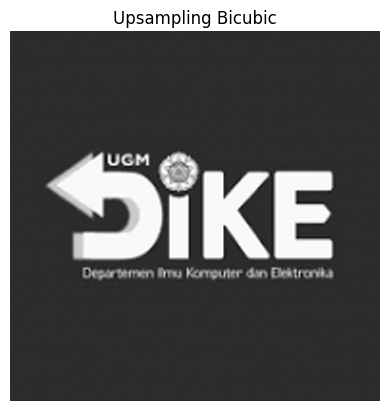

In [119]:
output_img = Image.open("/content/dike_up_bicubic.png")

plt.imshow(output_img, cmap="gray")
plt.axis("off")
plt.title("Upsampling Bicubic")
plt.show()

# Perbandingan dan Analisis Hasil Upsampling Citra

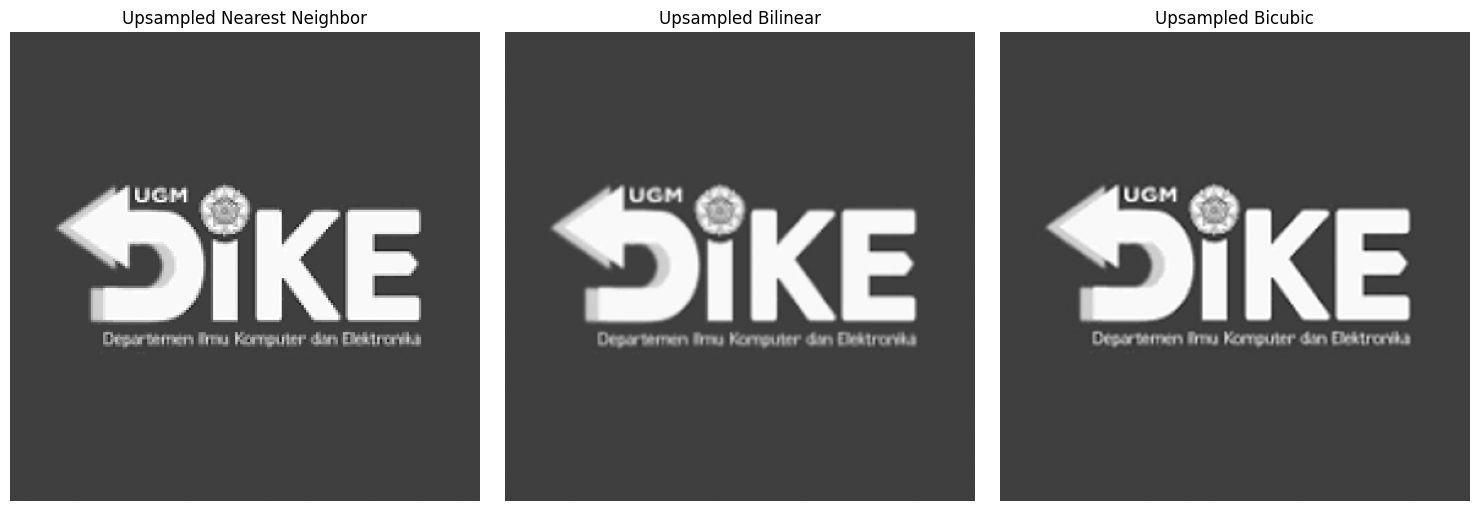

In [121]:
import matplotlib.pyplot as plt
from PIL import Image

# Buka gambar
img_down_max    = Image.open("dike_up_nearest.png").convert("L")
img_down_mean   = Image.open("dike_up_bilinear.png").convert("L")
img_down_median = Image.open("dike_up_bicubic.png").convert("L")

# Plot 1 baris × 3 kolom
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(img_down_max, cmap="gray", vmin=0, vmax=255)
axs[0].set_title("Upsampled Nearest Neighbor")
axs[0].axis("off")

axs[1].imshow(img_down_mean, cmap="gray", vmin=0, vmax=255)
axs[1].set_title("Upsampled Bilinear")
axs[1].axis("off")

axs[2].imshow(img_down_median, cmap="gray", vmin=0, vmax=255)
axs[2].set_title("Upsampled Bicubic")
axs[2].axis("off")

plt.tight_layout()
plt.show()


**Zoom in ketiga hasil**

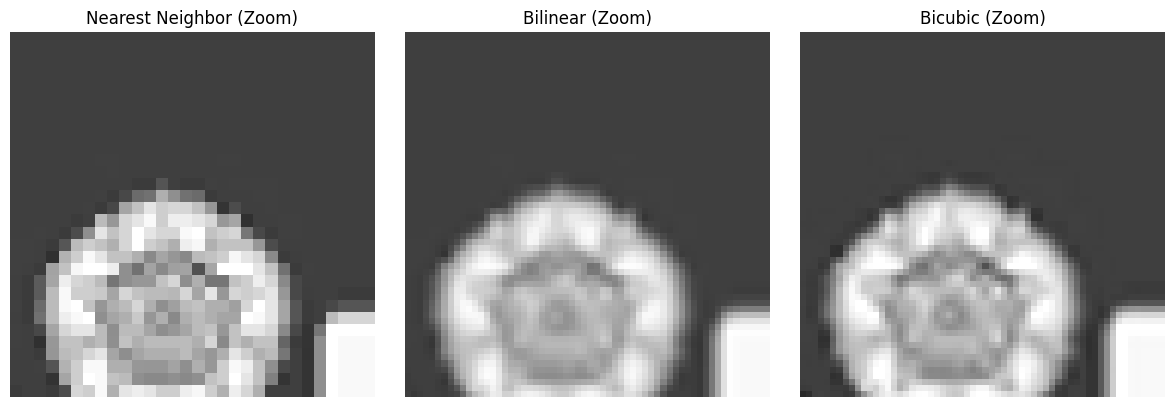

In [123]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

img_nearest = np.array(Image.open("dike_up_nearest.png").convert("L"))
img_bilinear = np.array(Image.open("dike_up_bilinear.png").convert("L"))
img_bicubic = np.array(Image.open("dike_up_bicubic.png").convert("L"))

# grid zoom
y1, y2 = 100, 160
x1, x2 = 150, 210

roi_nearest = img_nearest[y1:y2, x1:x2]
roi_bilinear = img_bilinear[y1:y2, x1:x2]
roi_bicubic = img_bicubic[y1:y2, x1:x2]

fig, axs = plt.subplots(1, 3, figsize=(12, 4))

axs[0].imshow(roi_nearest, cmap="gray", vmin=0, vmax=255)
axs[0].set_title("Nearest Neighbor (Zoom)")
axs[0].axis("off")

axs[1].imshow(roi_bilinear, cmap="gray", vmin=0, vmax=255)
axs[1].set_title("Bilinear (Zoom)")
axs[1].axis("off")

axs[2].imshow(roi_bicubic, cmap="gray", vmin=0, vmax=255)
axs[2].set_title("Bicubic (Zoom)")
axs[2].axis("off")

plt.tight_layout()
plt.show()


Dari hasil upsampling di atas, tampak bahwa Bicubic Interpolation memiliki hasil paling detail dan lebih halus daripada dua metode yang lain.

Hasil metode nearest neighbor menampilkan kotak-kotak yang lebih tajam (pixelate), sementara hasil metode bilinear interpolation tidak sekasar nearest neighbor dan tidak sedetail bicubic.

# Referensi

1. Gonzalez, R. C., & Woods, R. E. (2008). Digital image processing (3rd ed.). Prentice Hall.